In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

generator = np.random.default_rng(0x0)

# 10.4.4 Simulations and Correlograms

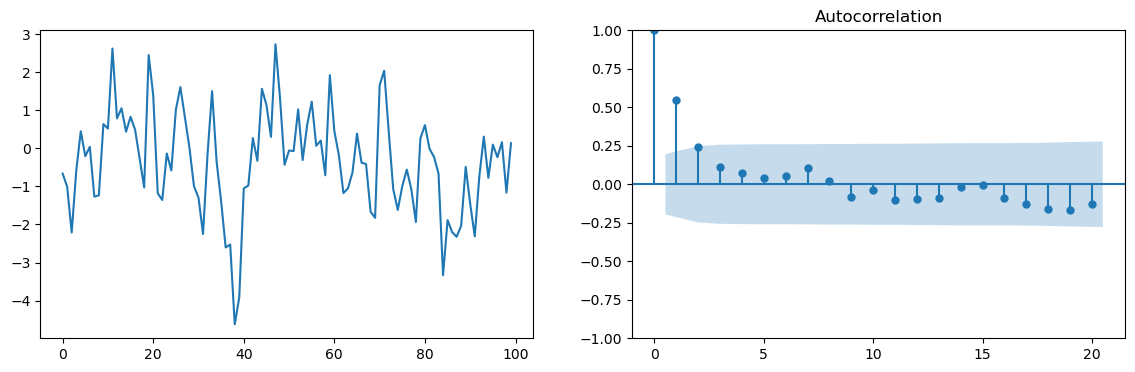

In [4]:
x = w = generator.normal(size=100)

for t in range(1, 100):
    x[t] = 0.6*x[t-1] + w[t]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(x)
plot_acf(x, ax=axes[1])
plt.show()

In [9]:
from statsmodels.tsa.ar_model import ar_select_order

sel = ar_select_order(x, 10)
res = sel.model.fit()
print(res.summary())

res.std


[1]
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -151.508
Method:               Conditional MLE   S.D. of innovations              1.118
Date:                Wed, 07 Aug 2024   AIC                            309.016
Time:                        21:59:38   BIC                            316.802
Sample:                             1   HQIC                           312.166
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1504      0.116     -1.295      0.195      -0.378       0.077
y.L1           0.5496      0.084      6.542      0.000       0.385       0.714
                                    Roots       

In [10]:
x = w = generator.normal(size=100)

for t in range(1, 100):
    x[t] = -0.6*x[t-1] + w[t]
    
sel = ar_select_order(x, 10)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -131.893
Method:               Conditional MLE   S.D. of innovations              0.917
Date:                Wed, 07 Aug 2024   AIC                            269.786
Time:                        22:04:37   BIC                            277.572
Sample:                             1   HQIC                           272.936
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0528      0.092     -0.573      0.567      -0.233       0.128
y.L1          -0.6581      0.075     -8.761      0.000      -0.805      -0.511
                                    Roots           

# AR(2)

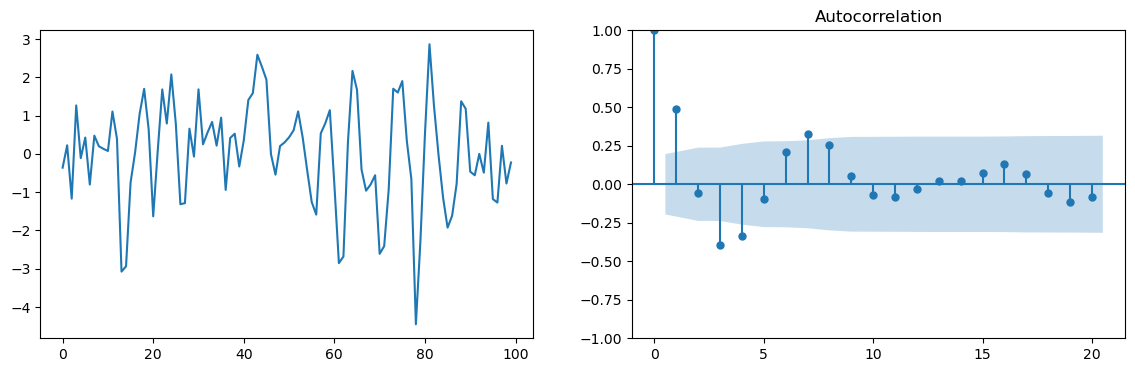

In [11]:
x = w = generator.normal(size=100)

for t in range(1, 100):
    x[t] = 0.666*x[t-1] - 0.333*x[t-2] + w[t]
    
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(x)
plot_acf(x, ax=axes[1])
plt.show()

In [12]:
sel = ar_select_order(x, 10)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -147.541
Method:               Conditional MLE   S.D. of innovations              1.090
Date:                Wed, 07 Aug 2024   AIC                            303.082
Time:                        22:06:25   BIC                            313.422
Sample:                             2   HQIC                           307.264
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.110      0.101      0.920      -0.205       0.227
y.L1           0.6741      0.093      7.232      0.000       0.491       0.857
y.L2          -0.3847      0.093     -4.122      0.0

# 10.5 Moving Average (MA) Models of order q

### 10.5.4 Simulations and Correlograms

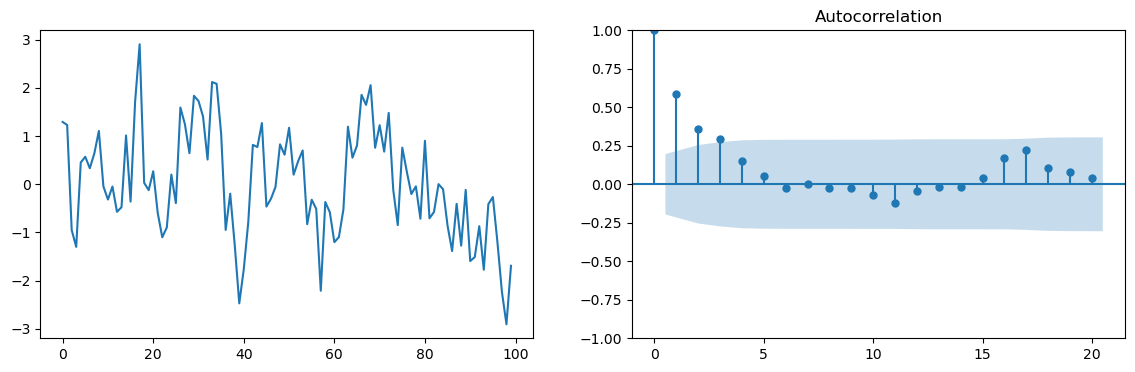

In [13]:
x = w = generator.normal(size=100)

for t in range(1, 100):
    x[t] = w[t] + 0.6*w[t-1]
    
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(x)
plot_acf(x, ax=axes[1])
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(x, order=(0, 0, 1))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -136.831
Date:                Wed, 07 Aug 2024   AIC                            279.662
Time:                        22:11:54   BIC                            287.477
Sample:                             0   HQIC                           282.825
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.146      0.139      0.889      -0.266       0.307
ma.L1          0.5476      0.079      6.971      0.000       0.394       0.701
sigma2         0.9005      0.150      6.013      0.0

The summary is read slightly differently than in the book.
* `const` is the `intercept` in the book, and `std err` is `s.e` in the book.
* `ma.L1` is `ma1` in the book.
* `sigma2` is `sigma^2` in the book, and the `log likelihood` and `AIC` are the same.
